**Modeling and Evaluation**

### Objectives

* Business requirements 2:
- The client is interested in predicting if a cherry leaf is healthy or contains powdery mildew

### Inputs

* Data from test, train validation folders
* Image shape 

### Outputs

* Image augmentation
* Model creation
* Model training
* Save model
* Learning curve
* Model Evaluation
* Matrix
* Save evaluation
* Check prediction on new file

### Import

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import joblib

### Set working directory

In [2]:
current_dir = os.getcwd()
current_dir

'/workspace/ML5-Mildew-Detection/jupyter_notebooks'

In [3]:
os.chdir('/workspace/ML5-Mildew-Detection')
print("You set a new current directory")

You set a new current directory


Double check directory set correctly

In [4]:
working_dir = os.getcwd()
working_dir

'/workspace/ML5-Mildew-Detection'

## Setting input directories

In [5]:
my_data_dir = 'inputs/cherryleaves_data/cherry-leaves'
training_path = my_data_dir + '/train' 
validation_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

## Setting output directory

In [ ]:
version = 'v3'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(working_dir) and version in os.listdir(working_dir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path)

---

## Set labels

In [7]:
labels = os.listdir(training_path)
print('Label for the images are', labels)

Label for the images are ['healthy', 'powdery_mildew']


### Image shape

In [8]:
version = 'v1'
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")
image_shape

(256, 256, 3)

Count number images in each folder

In [10]:
import plotly.express as px

df_freq = pd.DataFrame([])
for folder in ['train', 'test', 'validation']:
    for label in labels:
        df_freq = df_freq.append(
            pd.Series(data={'Set': folder,
                            'Label': label,
                            'Count': int(len(os.listdir(my_data_dir + '/' + folder + '/' + label)))}
                      ),
            ignore_index=True
        )

        print(
            f"* {folder} - {label}: {len(os.listdir(my_data_dir+'/'+ folder + '/' + label))} images")

print("\n")

* train - healthy: 1472 images
* train - powdery_mildew: 1472 images
* test - healthy: 422 images
* test - powdery_mildew: 422 images
* validation - healthy: 210 images
* validation - powdery_mildew: 210 images




Label Distribution

In [10]:


fig = px.bar(df_freq, 
            x="Set", 
            y="Count", 
            color='Label', 
            title="Cherry Leaves Dataset",
            barmode="group",
            text="Label")
fig.update_layout(
    autosize=False,
    width=900, 
    height=600, 
    )
fig.show()
fig.write_image(f'{file_path}/label_distribution.png')

---

Something to make in unique

## Image data augmentation

import ImageDataGenerator

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Intiatize ImageDataGenerator


In [10]:
augmented_image_data = ImageDataGenerator(rotation_range=20,
                                   width_shift_range=0.10, 
                                   height_shift_range=0.10,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest',
                                   rescale=1./255
                              )

### Batch size

In [11]:
batch_size = 20

### Augment training image set

In [14]:
train_set = augmented_image_data.flow_from_directory(training_path,
                                                     target_size=image_shape[:2],
                                                     color_mode='rgb',
                                                     batch_size=batch_size,
                                                     class_mode='binary',
                                                     shuffle=True
                                                     )

train_set.class_indices
class_names_str = ", ".join(train_set.class_indices)

print(f"Classes: {class_names_str}")

Found 2944 images belonging to 2 classes.
Classes: healthy, powdery_mildew


### Augment Validation Dataset Images

In [12]:
validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(validation_path,
                                                          target_size=image_shape[:2],
                                                          color_mode='rgb',
                                                          batch_size=batch_size,
                                                          class_mode='binary',
                                                          shuffle=False
                                                          )

validation_set.class_indices
class_names_str_1 = ", ".join(validation_set.class_indices)
print(f"Classes: {class_names_str_1}")

Found 420 images belonging to 2 classes.
Classes: healthy, powdery_mildew


### Augment Test Dataset Images

In [13]:
test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(test_path,
                                                    target_size=image_shape[:2],
                                                    color_mode='rgb',
                                                    batch_size=batch_size,
                                                    class_mode='binary',
                                                    shuffle=False
                                                    )

test_set.class_indices
class_names_str_2 = ", ".join(test_set.class_indices)
print(f"Classes: {class_names_str_2}")

Found 844 images belonging to 2 classes.
Classes: healthy, powdery_mildew


### Plot augmented test images

(20, 256, 256, 3)


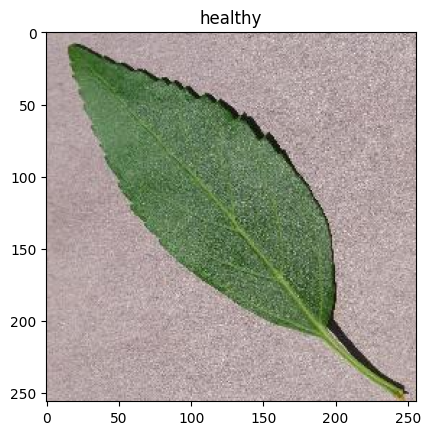

(20, 256, 256, 3)


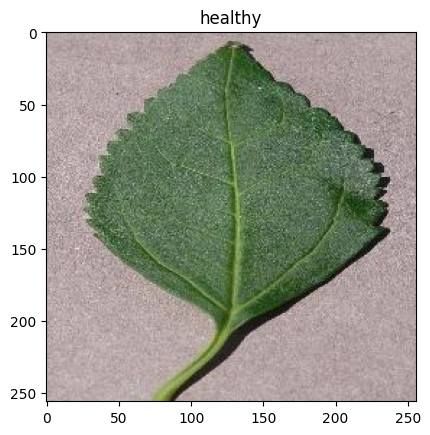

(20, 256, 256, 3)


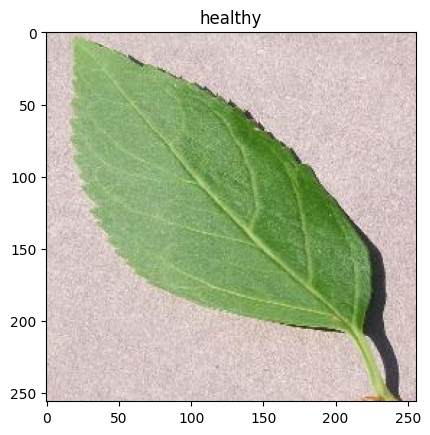

In [30]:
for _ in range(3):
    img, label = test_set.next()
    img_class = list(test_set.class_indices.keys())[np.argmax(label)]
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
    plt.title(img_class)
    plt.show()




### Plot augmented training image set

In [33]:
for _ in range(3):
    img, label = train_set.next()
    img_class = list(train_set.class_indices.keys())[np.argmax(label)]
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
    plt.title(img_class)
    plt.show()

IndexError: list index out of range

### Augment validation image set

(20, 256, 256, 3)


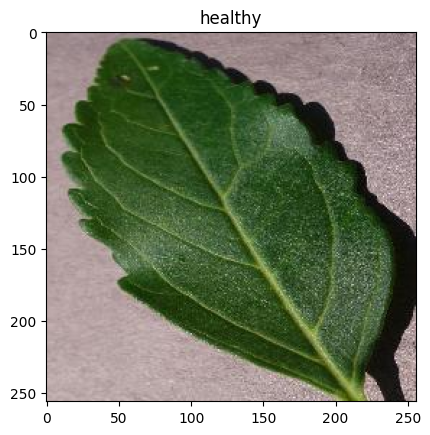

(20, 256, 256, 3)


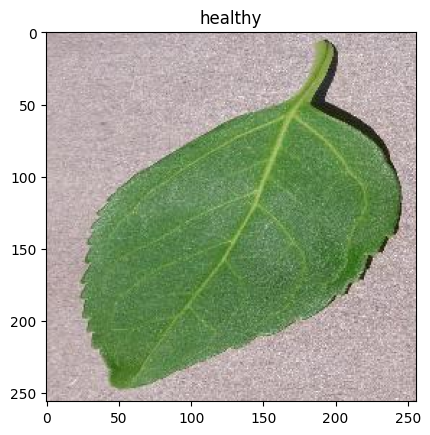

(20, 256, 256, 3)


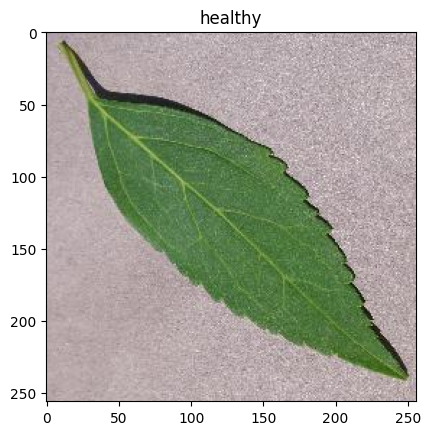

In [32]:
for _ in range(3):
    img, label = validation_set.next()
    img_class = list(validation_set.class_indices.keys())[np.argmax(label)]
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
    plt.title(img_class)
    plt.show()

### Save class_indices


In [34]:
joblib.dump(value=train_set.class_indices,
            filename=f"{file_path}/class_indices_1.pkl")

['outputs/v1/class_indices_1.pkl']

## Model Creation

### Import model packages

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

## Model

In [16]:
def create_tf_model():
    model = Sequential()


### input
    model.add(Conv2D(filters=16, kernel_size=(3, 3),
              input_shape=image_shape, activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2, 2)))


### conv layers 
    model.add(Conv2D(filters=64, kernel_size=(3, 3),
              input_shape=image_shape, activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3, 3),
              input_shape=image_shape, activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))


### output
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

### Model Summary

In [17]:
create_tf_model().summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      9280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 57600)             0

2023-03-29 18:20:01.943154: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Early Stopping

In [18]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=2)

### Fit model for training

In [19]:
model = create_tf_model()
model.fit(train_set,
          epochs=25,
          steps_per_epoch=len(train_set.classes) // batch_size,
          validation_data=validation_set,
          callbacks=[early_stop],
          verbose=1
          )

2023-03-29 18:20:16.769150: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/25
147/147 [==============================] - 119s 798ms/step - loss: 0.2936 - accuracy: 0.8769 - val_loss: 0.0799 - val_accuracy: 0.9810
Epoch 2/25
147/147 [==============================] - 117s 797ms/step - loss: 0.0993 - accuracy: 0.9672 - val_loss: 0.0068 - val_accuracy: 0.9952
Epoch 3/25
147/147 [==============================] - 117s 795ms/step - loss: 0.0250 - accuracy: 0.9921 - val_loss: 0.0534 - val_accuracy: 0.9881
Epoch 4/25
147/147 [==============================] - 116s 790ms/step - loss: 0.0527 - accuracy: 0.9815 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 5/25
147/147 [==============================] - 117s 795ms/step - loss: 0.0137 - accuracy: 0.9959 - val_loss: 0.0027 - val_accuracy: 0.9976
Epoch 6/25
147/147 [==============================] - 116s 791ms/step - loss: 0.0154 - accuracy: 0.9945 - val_loss: 9.9432e-04 - val_accuracy: 1.0000
Epoch 7/25
147/147 [==============================] - 117s 795ms/step - loss: 0.0051 - accuracy: 0.9983 - val_loss: 0.00

### Save model

In [21]:
model.save('outputs/v1/mildew_detection.h5')

## Model Performance

### Model learining curve

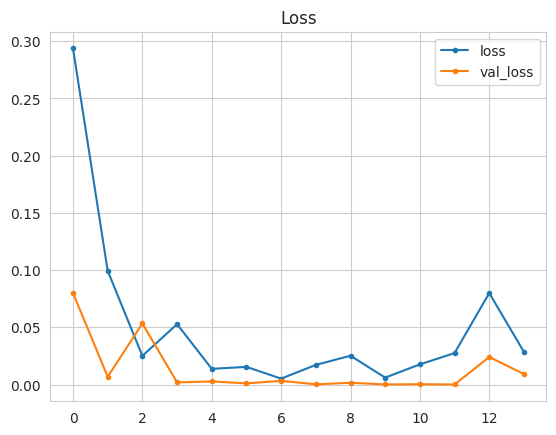

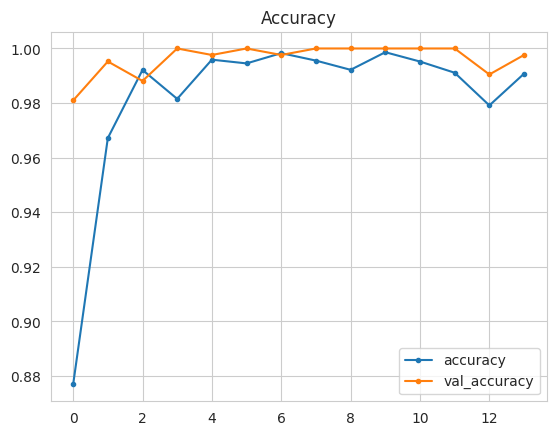

In [20]:
losses = pd.DataFrame(model.history.history)

sns.set_style("whitegrid")
losses[['loss', 'val_loss']].plot(style='.-')
plt.title("Loss")
plt.savefig(f'{file_path}/model_training_losses.png',
            bbox_inches='tight', dpi=150)
plt.show()

print("\n")
losses[['accuracy', 'val_accuracy']].plot(style='.-')
plt.title("Accuracy")
plt.savefig(f'{file_path}/model_training_acc.png',
            bbox_inches='tight', dpi=150)
plt.show()

## Model Evaluation

### Load saved model

In [22]:
from keras.models import load_model
model = load_model('outputs/v1/mildew_detection.h5')

### Evaluate model on test set


In [23]:
evaluation = model.evaluate(test_set)

43/43 [==============================] - 8s 176ms/step - loss: 0.0024 - accuracy: 0.9988


### Save evaluation pickle


In [24]:
joblib.dump(value=evaluation,
            filename=f"outputs/v1/evaluation.pkl")

['outputs/v1/evaluation.pkl']

## Predict on new data

### Load random image as PIL

Image shape: (256, 256), Image mode: RGB


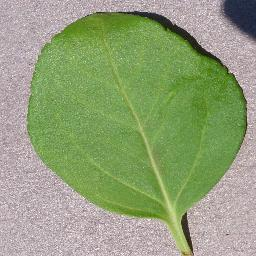

In [25]:
from tensorflow.keras.preprocessing import image

pointer = 66
label = labels[0]  # select healthy or infected leaves

pil_image = image.load_img(test_path + '/' + label + '/' + os.listdir(test_path+'/' + label)[pointer],
                           target_size=image_shape, color_mode='rgb')
print(f'Image shape: {pil_image.size}, Image mode: {pil_image.mode}')
pil_image

### Convert image to array and prepare for prediction

In [26]:
my_image = image.img_to_array(pil_image)
my_image = np.expand_dims(my_image, axis=0)/255
print(my_image.shape)

(1, 256, 256, 3)


### Predict class probabilities

In [27]:
pred_proba = model.predict(my_image)[0, 0]

target_map = {v: k for k, v in train_set.class_indices.items()}
pred_class = target_map[pred_proba > 0.5]

if pred_class == target_map[0]:
    pred_proba = 1 - pred_proba

print(pred_proba)
print(pred_class)

0.9999738566857559
healthy
